# Loading and Processing Data

MindSpore provides APIs for loading common datasets and datasets in standard formats. You can directly use the corresponding dataset loading class in mindspore.dataset to load data. The dataset class provides common data processing APIs for users to quickly process data.

## Loading the Dataset

In the following example, the CIFAR-10 dataset is loaded through the `Cifar10Dataset` API, and the first five samples are obtained using the sequential sampler.

In [1]:
import mindspore.dataset as ds

DATA_DIR = "./datasets/cifar-10-batches-bin/train"
sampler = ds.SequentialSampler(num_samples=5)
dataset = ds.Cifar10Dataset(DATA_DIR, sampler=sampler)

## Iterating Dataset

You can use `create_dict_iterator` to create a data iterator to iteratively access data. The following shows the image shapes and labels.

In [2]:
for data in dataset.create_dict_iterator():
    print("Image shape: {}".format(data['image'].shape), ", Label: {}".format(data['label']))

Image shape: (32, 32, 3) , Label: 6
Image shape: (32, 32, 3) , Label: 9
Image shape: (32, 32, 3) , Label: 9
Image shape: (32, 32, 3) , Label: 4
Image shape: (32, 32, 3) , Label: 1


## Customizing Datasets

For datasets that cannot be directly loaded by MindSpore, you can build a custom dataset class and use the `GeneratorDataset` API to customize data loading.


In [3]:
import numpy as np

np.random.seed(58)

class DatasetGenerator:
    def __init__(self):
        self.data = np.random.sample((5, 2))
        self.label = np.random.sample((5, 1))

    def __getitem__(self, index):
        return self.data[index], self.label[index]

    def __len__(self):
        return len(self.data)

You need to customize the following class functions:

- **\_\_init\_\_**

    When a dataset object is instantiated, the `__init__` function is called. You can perform operations such as data initialization.

    ```python
    def __init__(self):
        self.data = np.random.sample((5, 2))
        self.label = np.random.sample((5, 1))
    ```

- **\_\_getitem\_\_**

    Define the `__getitem__` function of the dataset class to support random access and obtain and return data in the dataset based on the specified `index` value.

    ```python
    def __getitem__(self, index):
        return self.data[index], self.label[index]
    ```

- **\_\_len\_\_**

    Define the `__len__` function of the dataset class and return the number of samples in the dataset.

    ```python
    def __len__(self):
        return len(self.data)
    ```

After the dataset class is defined, the `GeneratorDataset` API can be used to load and access dataset samples in the user-defined mode.

In [4]:
dataset_generator = DatasetGenerator()
dataset = ds.GeneratorDataset(dataset_generator, ["data", "label"], shuffle=False)

for data in dataset.create_dict_iterator():
    print('{}'.format(data["data"]), '{}'.format(data["label"]))

[0.36510558 0.45120592] [0.78888122]
[0.49606035 0.07562207] [0.38068183]
[0.57176158 0.28963401] [0.16271622]
[0.30880446 0.37487617] [0.54738768]
[0.81585667 0.96883469] [0.77994068]


## Data Processing and Augmentation

### Processing Data

The dataset APIs provided by MindSpore support common data processing methods. You only need to call the corresponding function APIs to quickly process data.

In the following example, the datasets are shuffled, and then two samples form a batch.

In [5]:
ds.config.set_seed(58)

# Shuffle the data sequence.
dataset = dataset.shuffle(buffer_size=10)
# Perform batch operations on datasets.
dataset = dataset.batch(batch_size=2)

for data in dataset.create_dict_iterator():
    print("data: {}".format(data["data"]))
    print("label: {}".format(data["label"]))

data: [[0.36510558 0.45120592]
 [0.57176158 0.28963401]]
label: [[0.78888122]
 [0.16271622]]
data: [[0.30880446 0.37487617]
 [0.49606035 0.07562207]]
label: [[0.54738768]
 [0.38068183]]
data: [[0.81585667 0.96883469]]
label: [[0.77994068]]


Where,

`buffer_size`: size of the buffer for shuffle operations in the dataset.

`batch_size`: number of data records in each group. Currently, each group contains 2 data records.

### Data Augmentation

If the data volume is too small or the sample scenario is simple, the model training effect is affected. You can perform the data augmentation operation to expand the sample diversity and improve the generalization capability of the model.

The following example uses the operators in the `mindspore.dataset.vision.c_transforms` module to perform data argumentation on the MNIST dataset.

Import the `c_transforms` module and load the MNIST dataset.

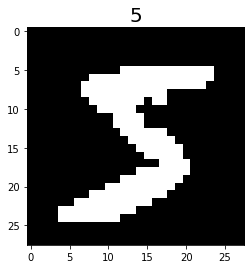

In [6]:
import matplotlib.pyplot as plt

from mindspore.dataset.vision import Inter
import mindspore.dataset.vision.c_transforms as c_vision

DATA_DIR = './datasets/MNIST_Data/train'

mnist_dataset = ds.MnistDataset(DATA_DIR, num_samples=6, shuffle=False)

# View the original image data.
mnist_it = mnist_dataset.create_dict_iterator()
data = next(mnist_it)
plt.imshow(data['image'].asnumpy().squeeze(), cmap=plt.cm.gray)
plt.title(data['label'].asnumpy(), fontsize=20)
plt.show()

Define the data augmentation operator, perform the `Resize` and `RandomCrop` operations on the dataset, and insert the dataset into the data processing pipeline through `map` mapping.


In [7]:
resize_op = c_vision.Resize(size=(200,200), interpolation=Inter.LINEAR)
crop_op = c_vision.RandomCrop(150)
transforms_list = [resize_op, crop_op]
mnist_dataset = mnist_dataset.map(operations=transforms_list, input_columns=["image"])

View the data augmentation effect.

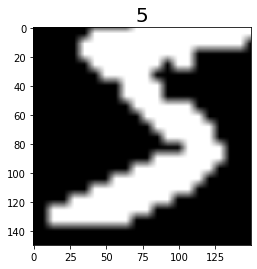

In [8]:
mnist_dataset = mnist_dataset.create_dict_iterator()
data = next(mnist_dataset)
plt.imshow(data['image'].asnumpy().squeeze(), cmap=plt.cm.gray)
plt.title(data['label'].asnumpy(), fontsize=20)
plt.show()

For more information, see [Data augmentation](https://www.mindspore.cn/doc/programming_guide/en/r1.2/augmentation.html).

In [ ]:
import os
pid = os.getpid()
!kill -9 $pid